In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data_test = pd.read_csv('./content/sample_data/test.csv')

In [80]:
data_train = pd.read_csv('/content/sample_data/train.csv')

In [81]:
sample = pd.read_csv('./content/sample_data/sample_submission.csv')

In [82]:
data_test

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TEST_000000,USER_00008,BOOK_047966,37.0,"vermilion, ohio, usa",Birds of Prey: A Novel of Suspense,J.A. Jance,2002.0,Avon
1,TEST_000001,USER_00008,BOOK_119494,37.0,"vermilion, ohio, usa",Midnight Voices,JOHN SAUL,2003.0,Ballantine Books
2,TEST_000002,USER_00008,BOOK_151775,37.0,"vermilion, ohio, usa",Breaking Free : A Prescription for Personal an...,David M. Noer,1996.0,Jossey-Bass
3,TEST_000003,USER_00008,BOOK_176255,37.0,"vermilion, ohio, usa",Bitter Harvest,Ann Rule,1999.0,Pocket
4,TEST_000004,USER_00008,BOOK_187307,37.0,"vermilion, ohio, usa",Embraced by the Light,Betty J. Eadie,1994.0,Bantam Books
...,...,...,...,...,...,...,...,...,...
159616,TEST_159616,USER_92086,BOOK_159050,0.0,"mountain view, california, usa",The Fat Flush Plan,Ann Louise Gittleman,2001.0,McGraw-Hill/Contemporary Books
159617,TEST_159617,USER_92086,BOOK_196481,0.0,"mountain view, california, usa",We Die Alone: A WWII Epic of Escape and Endurance,David Howarth,1999.0,The Lyons Press
159618,TEST_159618,USER_92086,BOOK_199754,0.0,"mountain view, california, usa",From 60 Yards In : How to Master Golf's Short ...,Raymond Floyd,1992.0,Perennial
159619,TEST_159619,USER_92086,BOOK_227481,0.0,"mountain view, california, usa",Solo: On Her Own Adventure,Susan Fox Rogers,1996.0,Seal Press (WA)


In [83]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159621 entries, 0 to 159620
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   159621 non-null  object 
 1   User-ID              159621 non-null  object 
 2   Book-ID              159621 non-null  object 
 3   Age                  159621 non-null  float64
 4   Location             159621 non-null  object 
 5   Book-Title           159621 non-null  object 
 6   Book-Author          159620 non-null  object 
 7   Year-Of-Publication  159621 non-null  float64
 8   Publisher            159621 non-null  object 
dtypes: float64(2), object(7)
memory usage: 11.0+ MB


## 컬럼값 분석

사용자 ID, 책 ID, 나이, 거주지, 도서 제목, 도서 작가, 출판 년도, 출판사

In [84]:
# 점수는 0~10
data_train['Book-Rating'].nunique()

11

In [85]:
data_train['Book-Rating'].value_counts()

Book-Rating
0     548804
8      76971
10     60024
7      55852
9      50494
5      38416
6      26670
4       6462
3       4374
2       2019
1       1307
Name: count, dtype: int64

In [86]:
# 분석의 타겟인 Book-rating 컬럼의 정보 확인
data_train['Book-Rating'].describe()

count    871393.000000
mean          2.820579
std           3.846906
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: Book-Rating, dtype: float64

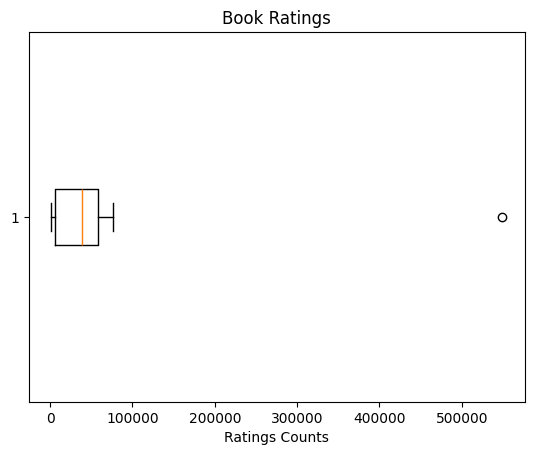

In [87]:
# Book-Rating 데이터
ratings = [548804, 76971, 60024, 55852, 50494, 38416, 26670, 6462, 4374, 2019, 1307]

# 박스플롯 그리기
plt.boxplot(ratings, vert=False)

# 그래프 제목과 축 레이블 추가
plt.title('Book Ratings')
plt.xlabel('Ratings Counts')

# 그래프 표시
plt.show()

In [88]:
# 지역도 너무 다양함
data_train['Location'].nunique()

20971

In [89]:
# 국가로 자른다
data_train['Location'] = data_train['Location'].apply(lambda x: x.split(',')[-1])

In [90]:
# 압축한 결과
data_train['Location'].nunique()

244

In [91]:
data_train['Book-Title'].nunique()

217829

In [92]:
data_train['Book-Title'].value_counts()

Book-Title
Wild Animus                                                                        2502
The Da Vinci Code                                                                   895
The Nanny Diaries: A Novel                                                          828
The Lovely Bones: A Novel                                                           768
A Painted House                                                                     761
                                                                                   ... 
Das Gesetz der Liebe. Inkl. CD.                                                       1
E- Mail an alle.                                                                      1
Enc/Brown/Saves/#7 (Encyclopedia Brown (Paperback))                                   1
Sitting Pretty                                                                        1
Creme De Colorado Cookbook (Celebrating Twenty Five Years of Culinary Artistry)       1
Name: count, Length: 

In [93]:
# sample 행에서 ID를 통해 인지하는 것으로 확인, ID column은 남기기로 한다
sample

,ID,Book-Rating
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0
...,...,...
159616,TEST_159616,0
159617,TEST_159617,0
159618,TEST_159618,0
159619,TEST_159619,0


In [94]:
# 결측값은 점수의 0을 제외하고는 없는 것으로 가정
data_train.isna().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [95]:
data_train['Book-Title'].nunique()

217829

In [96]:
data_train['Book-Author'].nunique()

92635

In [97]:
# 작가는 중요한 요소로 고려했지만, 너무 많은 수가 있다
data_train['Book-Author'].value_counts()

Book-Author
Stephen King           8467
Nora Roberts           6934
John Grisham           5283
James Patterson        5020
Mary Higgins Clark     3983
                       ... 
Cyrinda Foxe-Tyler        1
Matt Bloom                1
Cassie Kendall            1
Birney, M.D. Dibble       1
Stephen Griffith          1
Name: count, Length: 92635, dtype: int64

In [98]:
data_train['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002.0    77173
2001.0    67566
1999.0    64175
2000.0    61749
2003.0    60744
          ...  
2008.0        1
1909.0        1
1904.0        1
1378.0        1
1910.0        1
Name: count, Length: 110, dtype: int64

In [99]:
data_train['Year-Of-Publication'].describe()

count    871393.000000
mean       1968.903339
std         228.077752
min          -1.000000
25%        1991.000000
50%        1997.000000
75%        2001.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

In [100]:
data_train['Age'].describe()

count    871393.000000
mean         36.799861
std          12.065509
min           0.000000
25%          31.000000
50%          35.000000
75%          41.000000
max         244.000000
Name: Age, dtype: float64

### 컬럼값 확인 결과

1. 점수의 0점이 지나치게 많다. 결측값으로 추정된다.
2. Book-Title, Book-Author, Publisher 모두 너무 다양한 종류가 존재한다.
4. 출간 년도 에도 -1이 있다. 마찬가지로 나이도 0이 있다.
### 방향 정하기

1. 0점을 제외하기엔 데이터가 지나치게 많다. 우선 다른 문제들부터 처리해보기.
2. Book-Author은, value_counts의 값이 낮은 작가가 많았다. 일정 횟수 이상의 작가 제거를 고려한다.

In [101]:
author_counts = data_train['Book-Author'].value_counts()
# 100회 이하로 등장한 작가 필터링
selected_authors = author_counts[author_counts > 100].index

In [102]:
df_filtered = data_train[data_train['Book-Author'].isin(selected_authors)]

In [103]:
# 데이터는 비록 절반의 길이지만, 작가는 1234명으로 많이 줄었다
df_filtered['Book-Author'].nunique()

1234

In [104]:
# 사용가능한 몇 안되는 컬럼인 Age와 출판년도의 결측값을 제거한다
df_filtered = df_filtered[(df_filtered['Age'] != 0) & (df_filtered['Year-Of-Publication'] != -1)]

In [105]:
df_filtered['Book-Rating'].value_counts()

Book-Rating
0     277052
8      41219
10     30622
7      28765
9      27679
5      18358
6      13215
4       3124
3       2085
2        952
1        584
Name: count, dtype: int64

In [106]:
df_filtered['Book-Title'].nunique()

40212

In [107]:
df_filtered['Publisher'].nunique()

2412

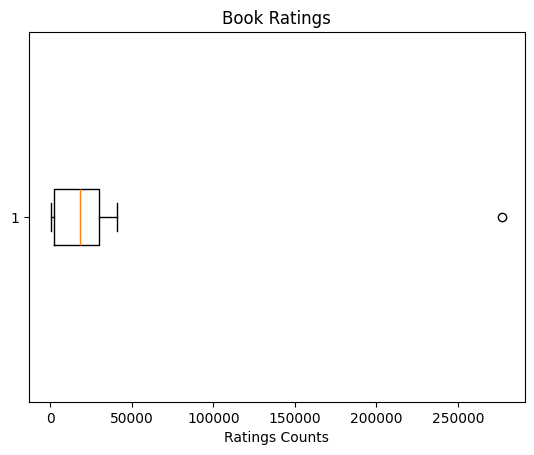

In [108]:
# Book-Rating 데이터
ratings = [277052, 41219, 30622, 28765, 27679, 18358, 13215, 3124, 2085, 952, 584]

# 박스플롯 그리기
plt.boxplot(ratings, vert=False)

# 그래프 제목과 축 레이블 추가
plt.title('Book Ratings')
plt.xlabel('Ratings Counts')

# 그래프 표시
plt.show()

In [109]:
# Book-title도 지나치게 다양하기에 우선 배제하고 돌리기로 한다.
df_filtered = df_filtered.drop('Book-Title', axis=1)

In [110]:
df_filtered.to_csv('./content/sample_data/train_jyp.csv')

In [111]:
# SVD 테스트
from surprise import SVD, Dataset, Reader, accuracy

In [112]:
train = pd.read_csv('./content/sample_data/train_jyp.csv')
test = pd.read_csv('./content/sample_data/test.csv')

In [113]:
# Surprise 라이브러리용 Reader 및 Dataset 객체 생성
reader = Reader(rating_scale=(0, 10))
train = Dataset.load_from_df(train[['User-ID', 'Book-ID', 'Book-Rating']], reader)
train = train.build_full_trainset()

In [114]:
# SVD 모델 훈련
model = SVD()
model.fit(train)

In [115]:
submit = pd.read_csv('./content/sample_data/sample_submission.csv')

In [116]:
submit['Book-Rating'] = test.apply(lambda row: model.predict(row['User-ID'], row['Book-ID']).est, axis=1)

In [117]:
submit.to_csv('./baseline_submit.csv', index=False)

In [118]:
result = pd.read_csv('./content/sample_data/sample_submission.csv')

In [120]:
submit['Book-Rating'].value_counts()

Book-Rating
2.882323    8134
0.000000    7140
8.431406    1862
0.780234    1281
0.180083    1146
            ... 
2.691702       1
1.071247       1
0.071796       1
4.540953       1
2.550925       1
Name: count, Length: 74058, dtype: int64